In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import glob
face_cascade = cv.CascadeClassifier('/anaconda3/lib/python3.6/site-packages/cv2/data/haarcascade_frontalface_default.xml')
eye_cascade = cv.CascadeClassifier('/anaconda3/lib/python3.6/site-packages/cv2/data/haarcascade_eye.xml')
# img = cv.imread('./input/2.jpg')

# final_wide = 500
# r = float(final_wide) / img.shape[1]
# dim = (final_wide, int(img.shape[0] * r))

# img = cv.resize(img, dim, interpolation = cv.INTER_AREA)
#gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)


In [105]:
def get_faces (img):
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    face_list = []
    faces = face_cascade.detectMultiScale(gray, 1.3, 1)
    for (x,y,w,h) in faces:
        face_list.append( img[y:y+h, x:x+w] )
    return face_list

In [106]:

def get_faces_in_dir_dict (path):
    paths = glob.glob( path +'*.jpg')
    faces_in_dir = {}
    for path_img in paths:
        img = cv.imread(path_img)
        faces_in_dir[path_img] = get_faces (img)
    return faces_in_dir
        

./input/2.jpg


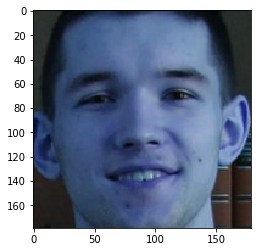

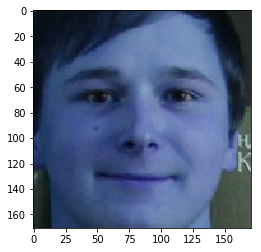

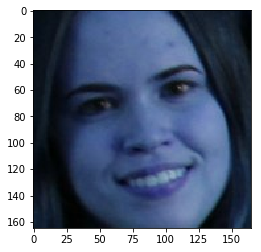

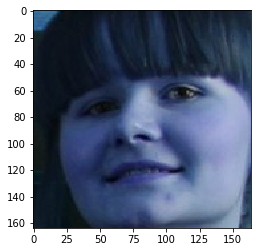

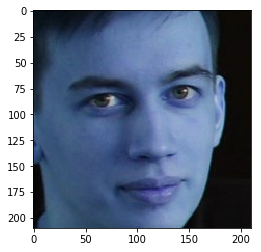

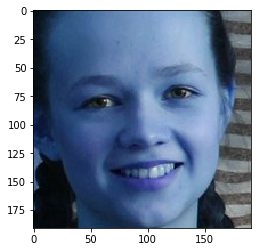

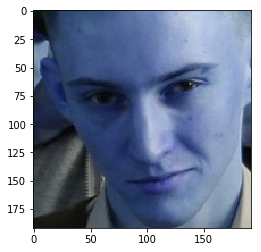

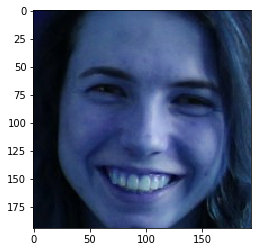

./input/1.jpg


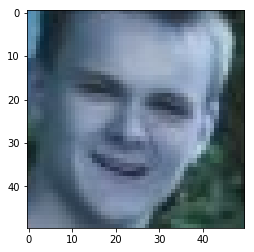

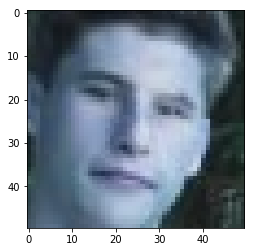

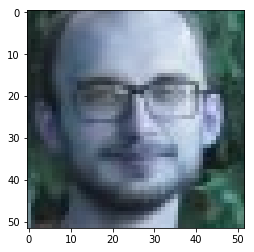

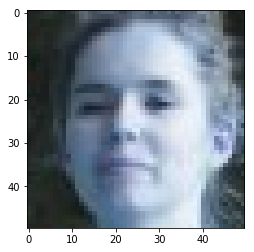

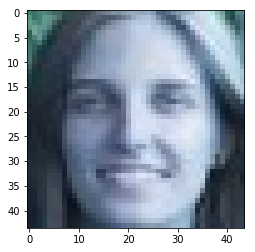

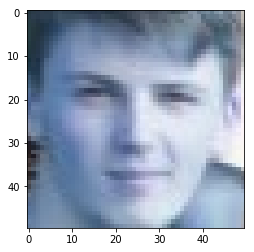

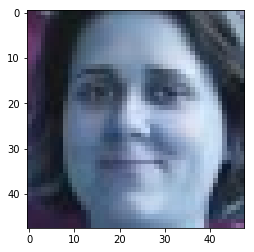

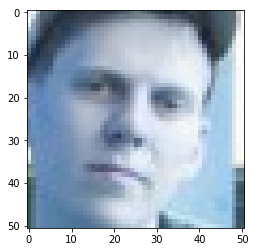

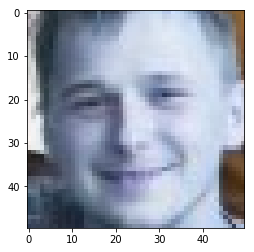

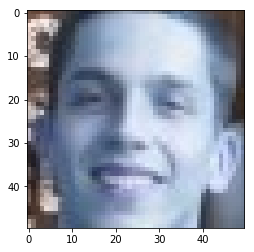

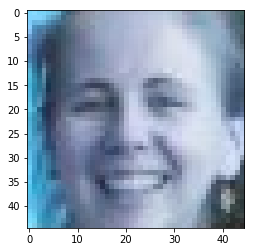

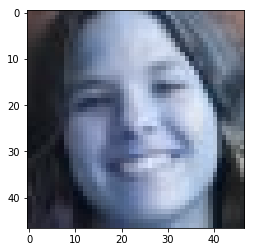

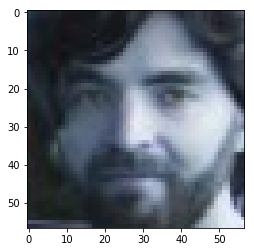

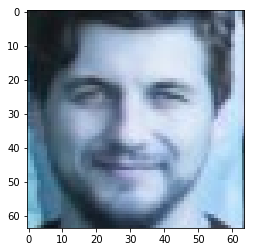

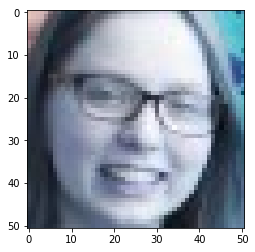

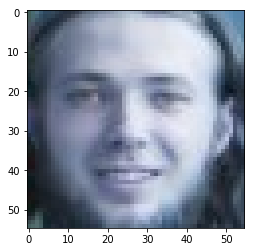

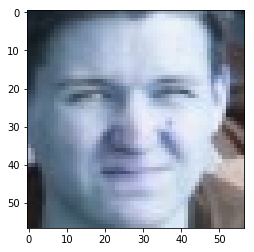

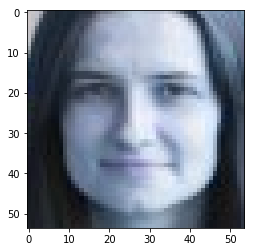

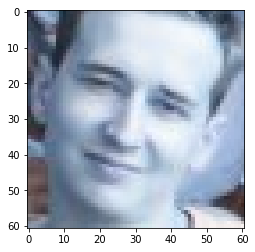

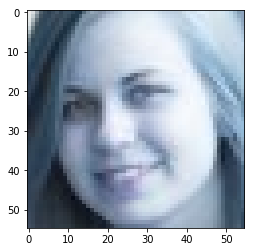

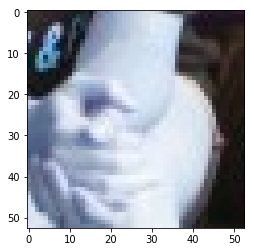

In [107]:
%matplotlib inline
faces_dict = get_faces_in_dir_dict('./input/')
for file in faces_dict:
    print (file)
    for face in faces_dict[file]:
        plt.imshow(face)
        plt.show()

In [108]:
def write_faces_for_dict (faces_dict, out_path):
    for file in faces_dict:
        i = 0
        print (file)
        for face in faces_dict[file]:
            i = i + 1
            cv.imwrite( out_path+ file.replace('.', '#').replace('/' , '$' ) + '%' + str(i)+ '%' + '.jpg' ,face )
            


In [109]:
write_faces_for_dict (faces_dict, './output/')

./input/2.jpg
./input/1.jpg


In [20]:
#faces = face_cascade.detectMultiScale(gray, 1.3, 3)

#for (x,y,w,h) in faces:
    #cv.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    #img2 = img[y:y+h, x:x+w] 
    #roi_gray = gray[y:y+h, x:x+w]
    #roi_color = img[y:y+h, x:x+w]
    #eyes = eye_cascade.detectMultiScale(roi_gray)
    #for (ex,ey,ew,eh) in eyes:
        #cv.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
#cv.imshow('img',img)
#cv.waitKey(0)
#cv.destroyAllWindows()